In [1]:
import platform
import sys
import ssl
import numpy as np
import matplotlib.pyplot as plt


print("os:            " + platform.platform())
print("python         " + sys.version)
print("openssl:       " + ssl.OPENSSL_VERSION)
print("TLSv1.2:       " + str(ssl.PROTOCOL_TLSv1_2))

os:            Darwin-19.6.0-x86_64-i386-64bit
python         3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
openssl:       OpenSSL 1.1.1d  10 Sep 2019
TLSv1.2:       _SSLMethod.PROTOCOL_TLSv1_2


In [2]:
# conda install -c anaconda mysql-connector-python

import mysql.connector as mysql

cnx = mysql.connect(
    host="mysqllahmansbaseball.mysql.database.azure.com", # this server will not remain available in the long term
    user="newuser@mysqllahmansbaseball",                  # this user name will not remain available in the long term
    password="Pa$$w0rd",                                  # this password will not remain available in the long term
    port=3306,
    ssl_disabled=True,                                    # not usually suitable for production code
    database="lahmansbaseballdb")
print(cnx)

In [3]:
cursor = cnx.cursor()
sql = "SELECT * FROM Batting LIMIT 10"
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)

(1, 'abercda01', 1871, 1, 'TRO', 8, 'NA', 1, None, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, None, None, None, 0)
(2, 'addybo01', 1871, 1, 'RC1', 7, 'NA', 25, None, 118, 30, 32, 6, 0, 0, 13, 8, 1, 4, 0, None, None, None, None, 0)
(3, 'allisar01', 1871, 1, 'CL1', 3, 'NA', 29, None, 137, 28, 40, 4, 5, 0, 19, 3, 1, 2, 5, None, None, None, None, 1)
(4, 'allisdo01', 1871, 1, 'WS3', 9, 'NA', 27, None, 133, 28, 44, 10, 2, 2, 27, 1, 1, 0, 2, None, None, None, None, 0)
(5, 'ansonca01', 1871, 1, 'RC1', 7, 'NA', 25, None, 120, 29, 39, 11, 3, 0, 16, 6, 2, 2, 1, None, None, None, None, 0)
(6, 'armstbo01', 1871, 1, 'FW1', 4, 'NA', 12, None, 49, 9, 11, 2, 1, 0, 5, 0, 1, 0, 1, None, None, None, None, 0)
(7, 'barkeal01', 1871, 1, 'RC1', 7, 'NA', 1, None, 4, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, None, None, None, None, 0)
(8, 'barnero01', 1871, 1, 'BS1', 1, 'NA', 31, None, 157, 66, 63, 10, 9, 0, 34, 11, 6, 13, 1, None, None, None, None, 1)
(9, 'barrebi01', 1871, 1, 'FW1', 4, 'NA', 1, None, 5, 1, 1, 1, 0, 0, 1, 0, 

In [4]:
sql = """
SELECT p.nameFirst, p.nameLast, b.rbi, t.name AS team, b.yearID
FROM batting b
    JOIN people p ON p.playerID = b.playerID
    JOIN teams t ON t.ID = b.team_ID
WHERE b.YearID >= 2015
ORDER BY b.rbi desc
LIMIT 5;
"""
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)

('Nolan', 'Arenado', 133, 'Colorado Rockies', 2016)
('Giancarlo', 'Stanton', 132, 'Miami Marlins', 2017)
('Nolan', 'Arenado', 130, 'Colorado Rockies', 2015)
('Nolan', 'Arenado', 130, 'Colorado Rockies', 2017)
('J. D.', 'Martinez', 130, 'Boston Red Sox', 2018)


In [5]:
import pandas as pd

df = pd.DataFrame(results)
print(df)

           0         1    2                 3     4
0      Nolan   Arenado  133  Colorado Rockies  2016
1  Giancarlo   Stanton  132     Miami Marlins  2017
2      Nolan   Arenado  130  Colorado Rockies  2015
3      Nolan   Arenado  130  Colorado Rockies  2017
4      J. D.  Martinez  130    Boston Red Sox  2018


In [6]:
headers = [i[0] for i in cursor.description]
print(headers)

['nameFirst', 'nameLast', 'rbi', 'team', 'yearID']


In [7]:
player = list(df[1] + ", " + df[0])
print(player)


['Arenado, Nolan', 'Stanton, Giancarlo', 'Arenado, Nolan', 'Arenado, Nolan', 'Martinez, J. D.']


In [8]:
df = pd.DataFrame(results, columns =[headers[0], headers[1], headers[2], headers[3], headers[4]], index=player)
print(df)

                    nameFirst  nameLast  rbi              team  yearID
Arenado, Nolan          Nolan   Arenado  133  Colorado Rockies    2016
Stanton, Giancarlo  Giancarlo   Stanton  132     Miami Marlins    2017
Arenado, Nolan          Nolan   Arenado  130  Colorado Rockies    2015
Arenado, Nolan          Nolan   Arenado  130  Colorado Rockies    2017
Martinez, J. D.         J. D.  Martinez  130    Boston Red Sox    2018


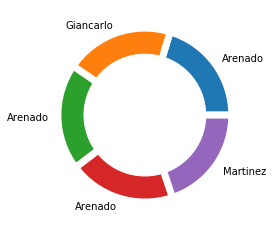

In [37]:
# library
import matplotlib.pyplot as plt
 
# create data
names='Arenado', 'Giancarlo', 'Arenado', 'Arenado', 'Martinez'
size=[133,132,130,130,130]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')


# wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


